In [17]:
# libraries

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# importing dataset

iris_data = pd.read_csv("/content/drive/MyDrive/dataset/IRIS.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# chceking for missing values

def missing_value_describe(data):
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data.")
missing_value_describe(iris_data)

Number of columns with missing values: 0
No misisng data.


In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# removing unique identifier

iris_data = iris_data.drop(columns=['Id'])
iris_data.columns

KeyError: "['Id'] not found in axis"

In [6]:
# no of columns and rows

iris_data.shape

(150, 5)

In [7]:
# gathering statistical analysis

iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# distribution of class

iris_data.groupby('species').size()

,0
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


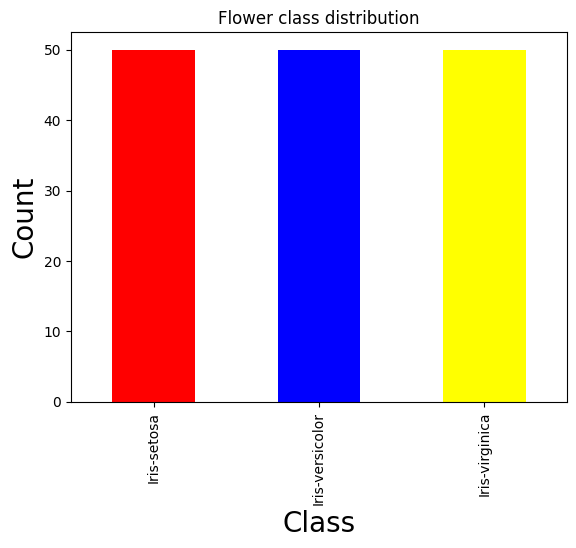

In [9]:
# iris flower dataset class distribution

nameplot = iris_data['species'].value_counts().plot.bar(title='Flower class distribution', color=['red', 'blue', 'yellow'])

# set x and y labels

plt.xlabel('Class', size=20)
plt.ylabel('Count', size=20)
plt.show()

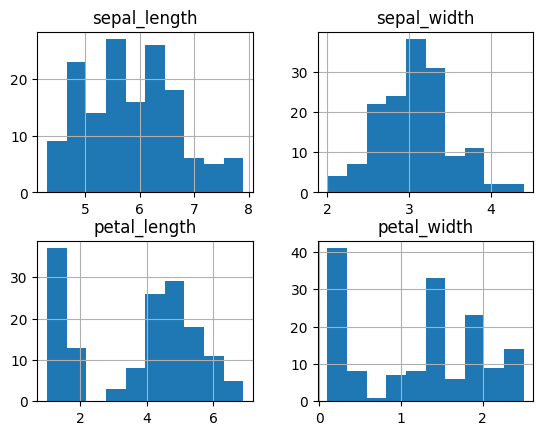

In [10]:
# histogram

iris_data.hist()
plt.show()

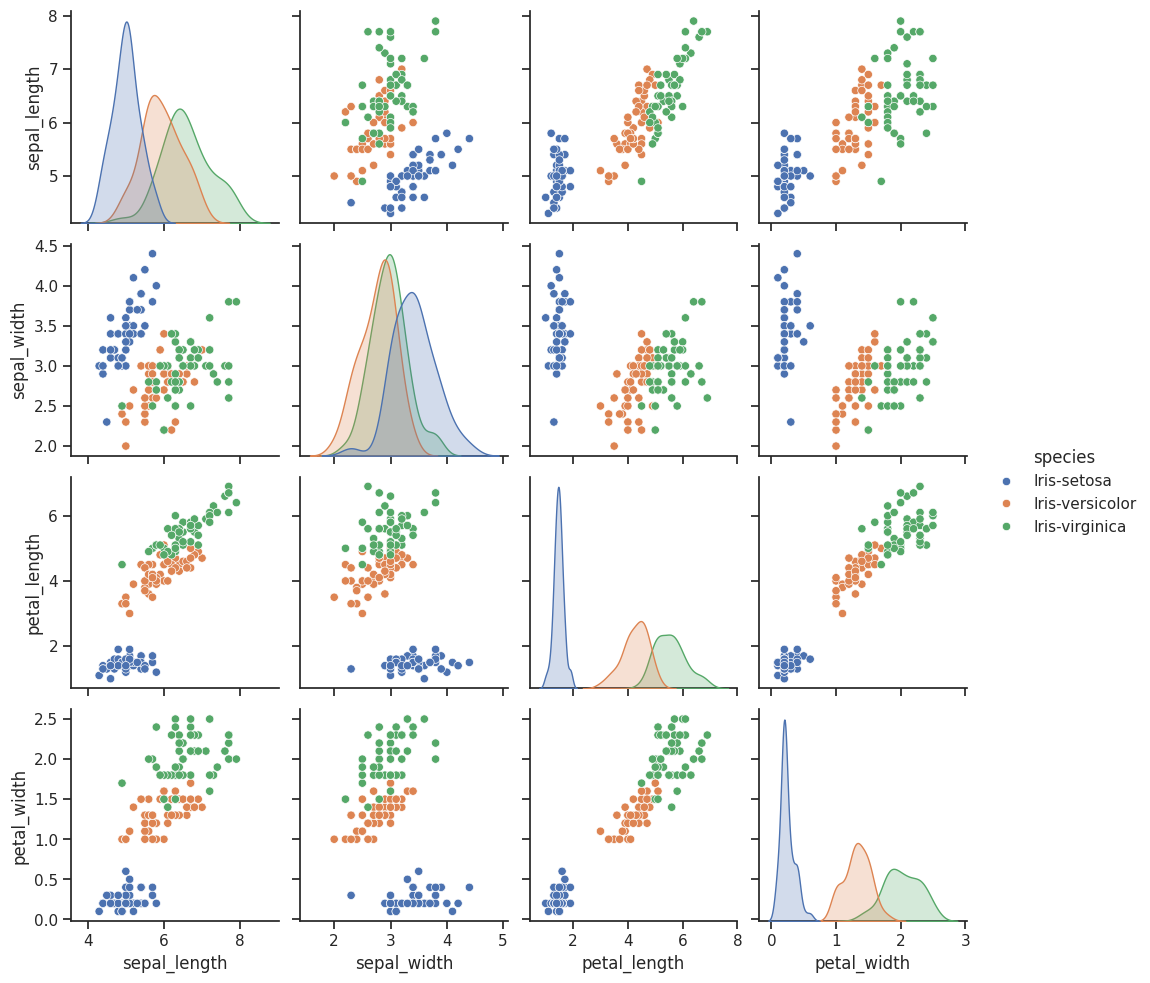

In [11]:
# multivariate scatter plot

sns.set(style="ticks")
sns.pairplot(iris_data, hue="species")
plt.show()

In [12]:
X = iris_data.drop(['species'], axis=1)
Y = iris_data['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [15]:
# Models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

# Evaluation
print("Model Accuracy:")
names = []
accuracy = []

kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # Updated KFold
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    accuracy.append(cv_results)
    msg = f"{name}: accuracy={cv_results.mean():.4f} std=({cv_results.std():.4f})"
    print(msg)


Model Accuracy:
LR: accuracy=0.9583 std=(0.0559)
LDA: accuracy=0.9750 std=(0.0382)
CART: accuracy=0.9500 std=(0.0764)
KNN: accuracy=0.9833 std=(0.0333)
GNB: accuracy=0.9667 std=(0.0408)
SVC: accuracy=0.9917 std=(0.0250)


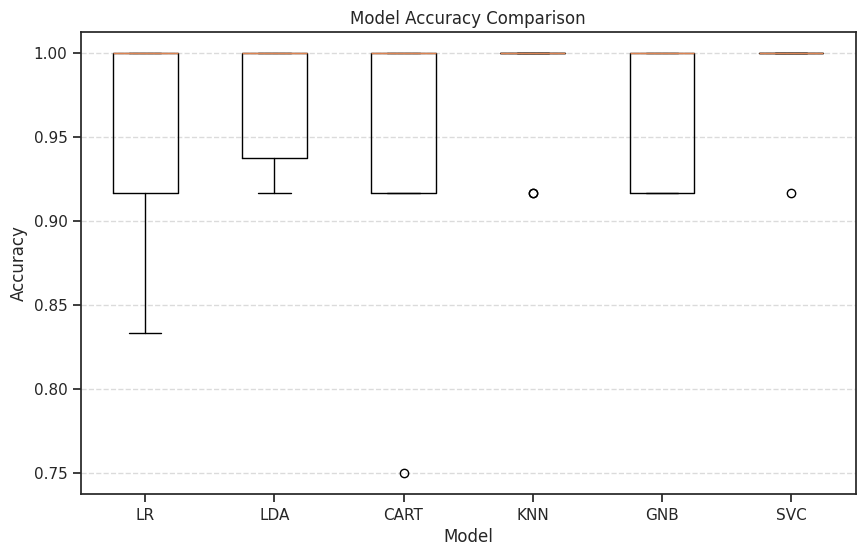

In [16]:
# model accuracy comparison

plt.figure(figsize=(10, 6))
plt.boxplot(accuracy, labels=names)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [18]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [20]:
# reusable function to test our model

def test_model(model):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

# output model testing results

    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [22]:
# value prediction via test set

for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei